## Lending CLub Case Study

- 1. Basic data import into python 
- 2. Configuration changes  -  MAX Columns display
- 3. Basic data exploration -  With descibe() with Pandas


In [62]:
# Libraries Imports
import pandas as pd
import matplotlib as plt

In [63]:
# Data Imports
loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")

# Set to display all the columns by changing the Pandas display option
pd.set_option("display.max_columns", 111)

C:\Users\lvinjamuri\AppData\Local\Temp\ipykernel_19232\1413180109.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")


In [64]:
# Show the data in the csv file
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Collating all the important columns

### Show count of sum of null items for all rows 

In [65]:
# Empty items in each column
nan_count = (loan_data.isnull().sum())

sorted_nan_count = nan_count.sort_values(ascending=True).rename_axis('count of sum of null items for all rows ')

# the number of missing items of all columns
pd.set_option("display.max_rows", None)


print(sorted_nan_count)

count of sum of null items for all rows 
id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0

### Dropping all the columns with more than 20000 null values         

In [66]:

#drop all the columns (axis=1)
columns_to_drop = ['mths_since_last_delinq',
                   'mths_since_last_record', 
                   'next_pymnt_d', 
                   'num_bc_sats',
                   'mths_since_recent_bc',
                   'mths_since_recent_bc_dlq',
                   'mths_since_recent_inq',
                   'mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd',
                   'num_actv_bc_tl',
                   'num_actv_rev_tl',
                   'mort_acc',
                   'num_bc_tl',
                   'num_tl_op_past_12m',
                   'num_op_rev_tl',
                   'num_rev_accts',
                   'num_rev_tl_bal_gt_0',
                   'num_sats',
                   'num_tl_120dpd_2m',
                   'num_tl_30dpd',
                   'num_tl_90g_dpd_24m',
                   'pct_tl_nvr_dlq',
                   'percent_bc_gt_75',
                   'tot_hi_cred_lim',
                   'total_bal_ex_mort',
                   'mo_sin_rcnt_tl',
                   'num_il_tl',
                   'mo_sin_rcnt_rev_tl_op',
                   'verification_status_joint',
                   'mo_sin_old_il_acct',
                   'mths_since_last_major_derog',
                   'annual_inc_joint',
                   'dti_joint',
                   'total_bc_limit',
                   'tot_coll_amt',
                   'tot_cur_bal',
                   'open_acc_6m',
                   'open_il_6m',
                   'open_il_12m',
                   'open_il_24m',
                   'mths_since_rcnt_il',
                   'total_bal_il',
                   'il_util',
                   'open_rv_12m',
                   'open_rv_24m',
                   'max_bal_bc',
                   'all_util',
                   'total_rev_hi_lim',
                   'inq_fi',
                   'total_cu_tl',
                   'inq_last_12m',
                   'acc_open_past_24mths',
                   'avg_cur_bal',
                   'bc_open_to_buy',
                   'bc_util',
                   'mo_sin_old_rev_tl_op',
                   'total_il_high_credit_limit',
                   'id',
                   'url',
                   'member_id',
                   'zip_code',
                   'emp_title'
                   ]
final_loan_data  = loan_data.drop(columns_to_drop,axis=1)


### Delete the records where the loan is still ongoing
- loan_status = Current

In [ ]:
current_loan_status = final_loan_data["loan_status"] !="Current"
final_loan_data = final_loan_data[current_loan_status]
final_loan_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,n,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,f,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [68]:
# Number of empty cells in all columns in the working dataframe
final_loan_data.isnull().sum().sort_values(ascending=False).rename_axis('Number of empty cells in all columns in the working dataframe')

Number of empty cells in all columns in the working dataframe
desc                          12529
emp_length                     1033
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_pymnt                       0
total_pymnt_inv                   0
out_prncp_inv                     0
out_prncp                         0
total_rec_prncp                   0
initial_list_status               0
total_rec_int                     0
collection_recovery_fee           0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                       0
total_acc                         0
lo

In [69]:
# Working dataframe
final_loan_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Basic Univariate analysis

### Univariate Analysis - Ordered Catgorical Values

In [70]:
# L
emp_title_count = final_loan_data['grade'].value_counts().rename_axis("Distribution of Loan Grades")
print(emp_title_count)

print(type(emp_title_count))

Distribution of Loan Grades
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


### How does home ownership determine if the customer might default
- Bivariate analyis

### home ownership 
- Rent
- Own
- Mortgage
- Other

### Loan status -
- Fully paid
- Current
- Charged off

In [71]:
import matplotlib.pyplot as plot
# Plot b/w home ownership and loan status

y_plt = final_loan_data["pub_rec"]
x_plt = final_loan_data["loan_status"]



In [72]:
plot.bar(x_plt, y_plt)
plot.show()

#### Reasons for Dropped columns 
- 1. emp_title column : Very large spread of this coluum items for any meaning analysis

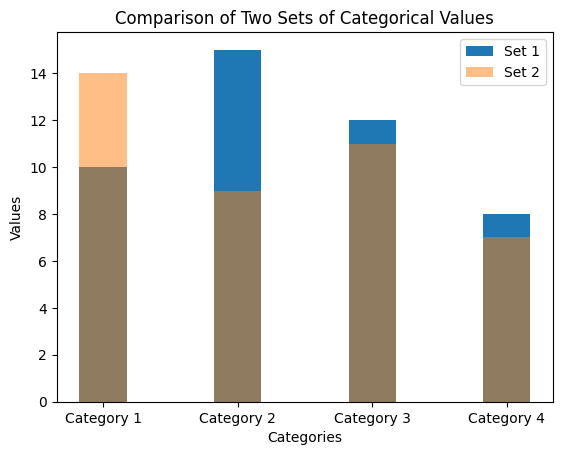

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = final_loan_data["home_ownership"]
values_set1 = [10, 15, 12, 8]
values_set2 = [14, 9, 11, 7]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = range(len(categories))

# Create the grouped bar chart
plt.bar(x, values_set1, width=bar_width, label='Set 1')
plt.bar(x, values_set2, width=bar_width, label='Set 2', alpha=0.5)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Two Sets of Categorical Values')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()